In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [262]:
df_train = pd.read_csv('CS98XClassificationTrain.csv')
df_test = pd.read_csv('CS98XClassificationTest.csv')

In [263]:
df_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [264]:
df_test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [266]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      113 non-null    int64 
 1   title   113 non-null    object
 2   artist  113 non-null    object
 3   year    113 non-null    int64 
 4   bpm     113 non-null    int64 
 5   nrgy    113 non-null    int64 
 6   dnce    113 non-null    int64 
 7   dB      113 non-null    int64 
 8   live    113 non-null    int64 
 9   val     113 non-null    int64 
 10  dur     113 non-null    int64 
 11  acous   113 non-null    int64 
 12  spch    113 non-null    int64 
 13  pop     113 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 12.5+ KB


In [267]:
df_train.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [268]:
df_test.isna().sum()

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [269]:
df_train.fillna(df_train['top genre'].mode()[0],inplace=True)

In [270]:
df_train.isna().sum()

Id           0
title        0
artist       0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
top genre    0
dtype: int64

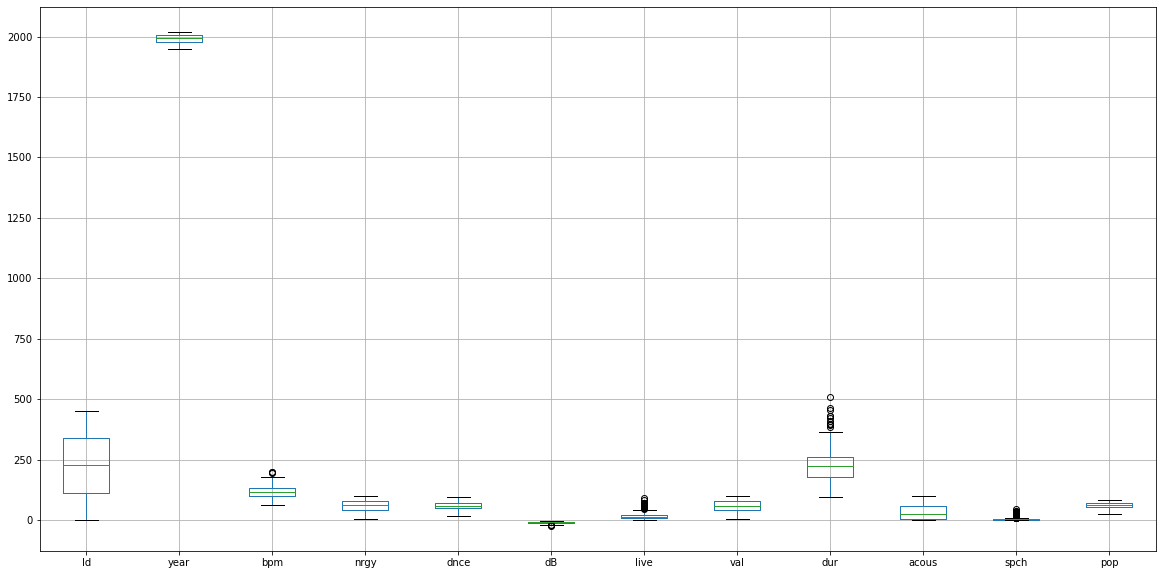

In [271]:
plt.figure(figsize=(20,10))
df_train.boxplot()
plt.show()

In [272]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_bound =  Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 *IQR
    return lower_bound, upper_bound

In [273]:
des_columns = ["bpm",'dnce',"dB","dur","spch","pop","live"]

In [274]:
for column in des_columns:
    lr,ur = remove_outliers(df_train[column])
    df_train[column] =np.where(df_train[column]>ur, ur, df_train[column])
    df_train[column] =np.where(df_train[column]<lr, lr, df_train[column])

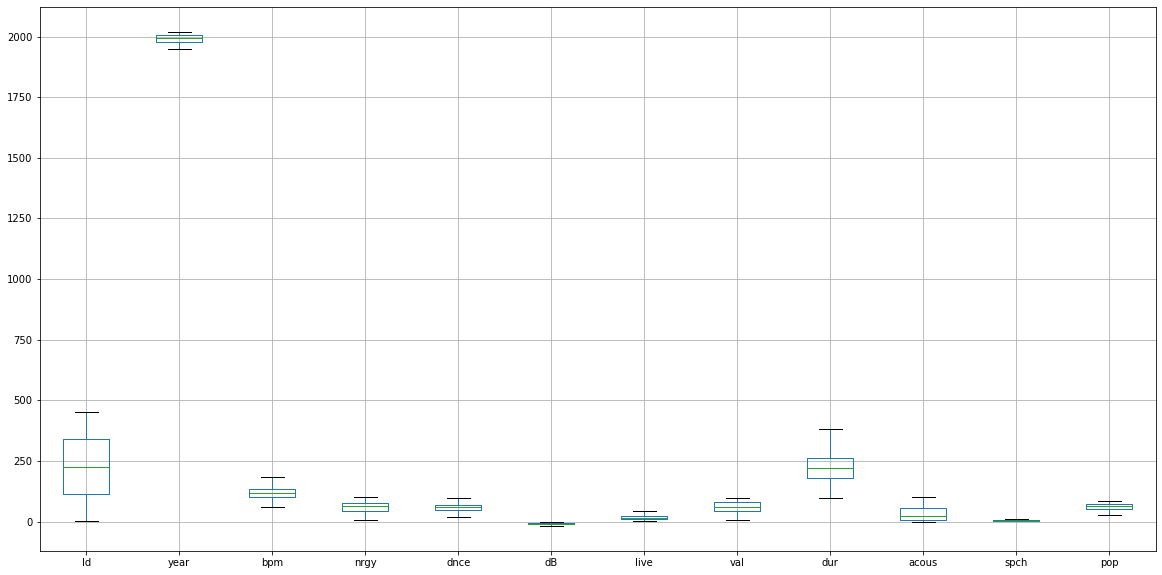

In [275]:
plt.figure(figsize=(20,10))
df_train.boxplot()
plt.show()

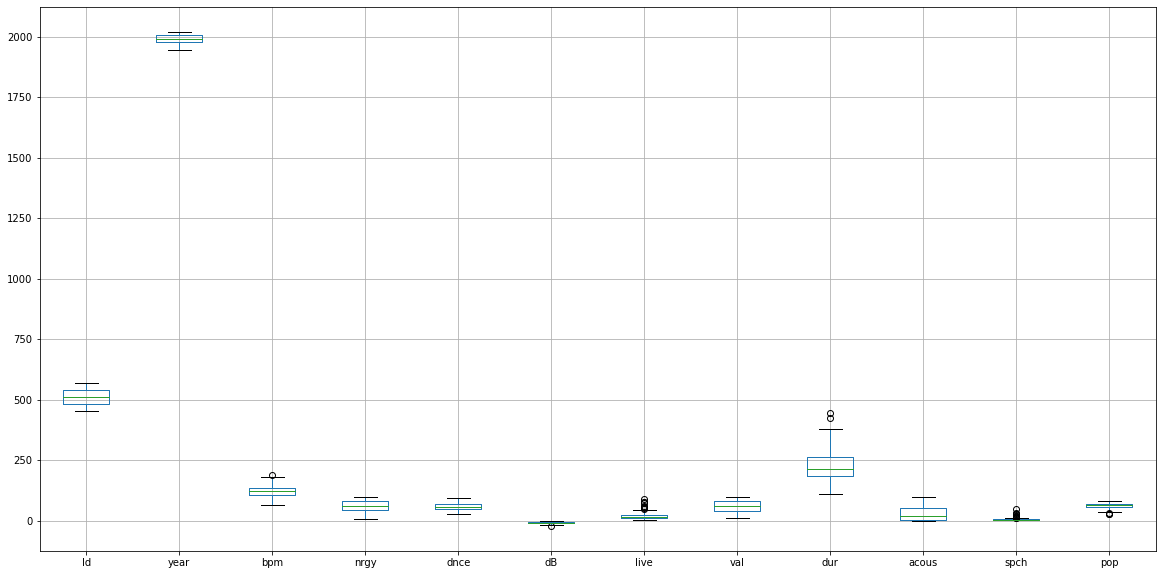

In [276]:
plt.figure(figsize=(20,10))
df_test.boxplot()
plt.show()

In [277]:
for column in des_columns:
    lr,ur = remove_outliers(df_test[column])
    df_test[column] =np.where(df_test[column]>ur, ur, df_test[column])
    df_test[column] =np.where(df_test[column]<lr, lr, df_test[column])

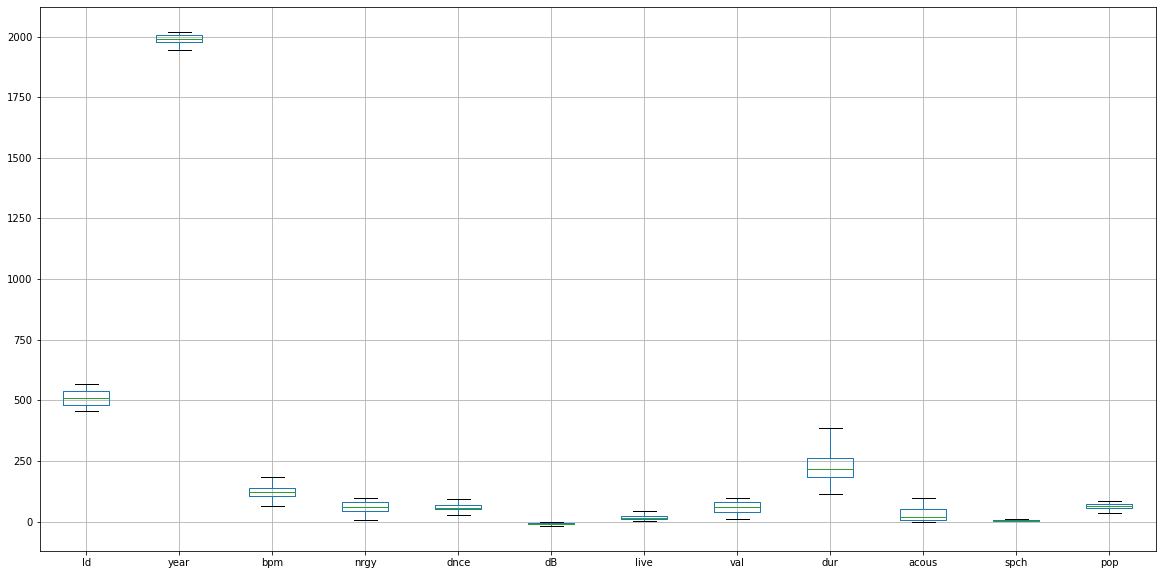

In [278]:
plt.figure(figsize=(20,10))
df_test.boxplot()
plt.show()

In [279]:
df_train = df_train.drop('Id',axis=1)
df_train = df_train.drop('title',axis=1)
df_train = df_train.drop('year',axis=1)

df_test = df_test.drop('Id',axis=1)
df_test = df_test.drop('title',axis=1)
df_test = df_test.drop('year',axis=1)

In [280]:
df_train.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,Connie Francis,107.0,31,45.0,-8.0,13.0,28,150.0,75,3.0,44.0,adult standards
1,The Teddy Bears,114.0,44,53.0,-8.0,13.0,47,139.0,49,3.0,37.0,adult standards
2,Bee Gees,105.0,36,63.0,-9.0,13.0,67,245.0,11,3.0,77.0,adult standards
3,Barbra Streisand,170.0,28,47.0,-16.0,13.0,33,232.0,25,3.0,67.0,adult standards
4,Elton John,121.0,47,56.0,-8.0,15.0,40,193.0,45,3.0,63.0,glam rock


In [281]:
df_test.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,The Black Eyed Peas,154.0,93,65.0,-3.0,45.0,74,213.0,1,10.5,72.0
1,Elton John,161.0,39,30.0,-15.0,11.0,14,292.0,26,3.0,59.0
2,Queen,64.0,46,27.0,-7.0,12.0,18,179.0,38,3.0,76.0
3,Faithless,127.0,92,71.0,-9.0,37.0,53,216.0,6,4.0,50.0
4,John Hartford,115.0,46,56.0,-12.0,21.0,34,153.0,18,3.0,44.0


In [282]:
df_train.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,Connie Francis,107.0,31,45.0,-8.0,13.0,28,150.0,75,3.0,44.0,adult standards
1,The Teddy Bears,114.0,44,53.0,-8.0,13.0,47,139.0,49,3.0,37.0,adult standards
2,Bee Gees,105.0,36,63.0,-9.0,13.0,67,245.0,11,3.0,77.0,adult standards
3,Barbra Streisand,170.0,28,47.0,-16.0,13.0,33,232.0,25,3.0,67.0,adult standards
4,Elton John,121.0,47,56.0,-8.0,15.0,40,193.0,45,3.0,63.0,glam rock


In [283]:
df_test.head()

,artist,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,The Black Eyed Peas,154.0,93,65.0,-3.0,45.0,74,213.0,1,10.5,72.0
1,Elton John,161.0,39,30.0,-15.0,11.0,14,292.0,26,3.0,59.0
2,Queen,64.0,46,27.0,-7.0,12.0,18,179.0,38,3.0,76.0
3,Faithless,127.0,92,71.0,-9.0,37.0,53,216.0,6,4.0,50.0
4,John Hartford,115.0,46,56.0,-12.0,21.0,34,153.0,18,3.0,44.0


In [284]:
df_train['top genre'].value_counts()

adult standards       83
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
louisiana blues        1
british dance band     1
canadian folk          1
deep house             1
brit funk              1
Name: top genre, Length: 86, dtype: int64

le = LabelEncoder()
df_train['artist'] = le.fit_transform(df_train['artist'])

In [285]:
a_encoded, a_categories = df_train['artist'].factorize()
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
a_hot = oh.fit_transform(a_encoded.reshape(-1,1))
df_train_en= df_train.drop('artist',axis=1)

df_train_attri_1 = ['artist']
df_train_num_attri_1 = list(df_train_en)
enc_data = pd.DataFrame(a_hot.toarray())
enc_data.columns = a_categories
print(enc_data.columns)
enc_data.index = df_train.index
print(enc_data.index)

df_train_prepared = df_train_en.join(enc_data,how='left', lsuffix='_left', rsuffix='_right')

Index(['Connie Francis', 'The Teddy Bears', 'Bee Gees', 'Barbra Streisand',
       'Elton John', 'Bruno Mars', 'The Guess Who', 'Boyz II Men',
       'Joan Regan', 'Timi Yuro',
       ...
       'New Order', 'Pat Boone', 'Britney Spears', 'Matthew Wilder',
       'Nick Kamen', 'The Searchers', 'Frankie Valli & The Four Seasons',
       'Peter And Gordon', 'Nelly', '*NSYNC'],
      dtype='object', length=345)
RangeIndex(start=0, stop=453, step=1)


In [286]:
X = df_train_prepared.drop('top genre',axis=1)
y = df_train_prepared['top genre']

In [287]:
from sklearn.preprocessing import normalize
X = normalize(X)


In [288]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)
X_train.shape

(407, 355)

In [289]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [290]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train_ST,y_train)

LogisticRegression(multi_class='ovr')

In [291]:
y_pred_log = log_reg.predict(X_test_ST)

In [292]:
accuracy_score(y_test,y_pred_log)

0.6956521739130435

In [293]:
rand_forest = RandomForestClassifier(random_state = 1, min_samples_split = 5)
rand_forest.fit(X_train_ST,y_train)

RandomForestClassifier(min_samples_split=5, random_state=1)

In [294]:
y_pred_rand = rand_forest.predict(X_test_ST)
accuracy_score(y_test,y_pred_rand)

0.5434782608695652

In [295]:
gua_nb = GaussianNB()
gua_nb.fit(X_train_ST,y_train)

GaussianNB()

In [296]:
y_pred_nb = gua_nb.predict(X_test_ST)
accuracy_score(y_test,y_pred_nb)

0.4782608695652174

In [297]:
svc = SVC()
svc.fit(X_train_ST,y_train)

SVC()

In [298]:
y_pred_svc = svc.predict(X_test_ST)
accuracy_score(y_test,y_pred_svc)

0.45652173913043476

In [299]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rand_forest), ('svc', svc),('gnb',gua_nb)],voting='hard')
voting_clf.fit(X_train_ST,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(multi_class='ovr')),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     random_state=1)),
                             ('svc', SVC()), ('gnb', GaussianNB())])

In [300]:
for clf in (log_reg, rand_forest, svc,gua_nb, voting_clf):
    clf.fit(X_train_ST, y_train)
    ypred = clf.predict(X_test_ST)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.6956521739130435
RandomForestClassifier 0.5434782608695652
SVC 0.45652173913043476
GaussianNB 0.4782608695652174
VotingClassifier 0.6521739130434783


In [301]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca.fit(X)

PCA(n_components=7)

In [302]:
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance,decimals=3)*100) 
var

array([40.4, 71.7, 83.8, 89.1, 93.8, 96.7, 99.3])

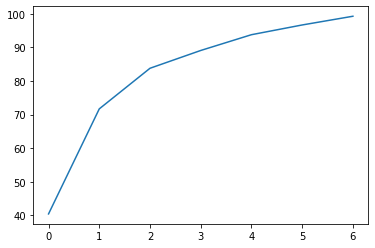

In [303]:
plt.plot(var)

In [304]:
from sklearn.metrics import classification_report, confusion_matrix

In [305]:
print(classification_report(y_test,y_pred_log))

                      precision    recall  f1-score   support

     adult standards       0.50      1.00      0.67         8
          album rock       0.44      0.80      0.57         5
            art rock       0.00      0.00      0.00         2
         atl hip hop       0.00      0.00      0.00         1
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       1.00      1.00      1.00         1
        british soul       0.00      0.00      0.00         2
     bubblegum dance       0.00      0.00      0.00         1
        canadian pop       1.00      1.00      1.00         1
  classic girl group       0.00      0.00      0.00         1
        classic soul       1.00      1.00      1.00         1
           dance pop       0.92      0.85      0.88        13
          dance rock       1.00      1.00      1.00         1
deep adult standards       0.00      0.00      0.00         1
               disco       1.00      1.00      1.00         1
       

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
y_test.shape

(46,)

In [307]:
y_pred_log.shape

(46,)

In [308]:
c_matrix = confusion_matrix(y_test,y_pred_log)
print(c_matrix)

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0

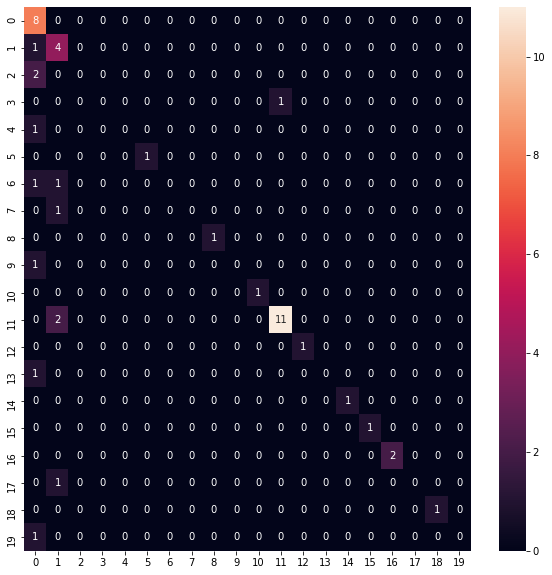

In [309]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix,annot=True)
plt.show()

In [310]:
from sklearn.cluster import KMeans

In [311]:
kmeans = KMeans(n_clusters=86,random_state=12)
kmeans.fit(X_train_ST,y_train)
ypred_k = kmeans.predict(X_test_ST)

In [312]:
kmeans.cluster_centers_

array([[ 0.45895878,  0.17606056,  1.22157762, ..., -0.04962917,
        -0.04962917, -0.04962917],
       [ 0.58201823,  0.82163895,  0.63135946, ..., -0.04962917,
        -0.04962917, -0.04962917],
       [-0.9581669 , -1.28202259,  0.00489367, ..., -0.04962917,
        -0.04962917, -0.04962917],
       ...,
       [ 1.35018189,  0.93291467, -2.41609285, ..., -0.04962917,
        -0.04962917, -0.04962917],
       [ 1.84597626, -0.72478646, -1.66446299, ..., -0.04962917,
        -0.04962917, -0.04962917],
       [ 2.47563365, -0.61342093,  0.61005141, ..., -0.04962917,
        -0.04962917, -0.04962917]])

In [313]:
kmeans.labels_

array([ 1, 64, 34,  1, 24, 66, 66, 66, 66, 24, 66, 66, 66, 66, 51, 72, 66,
        1, 66, 66, 66,  1, 14, 66, 10, 24, 24,  1, 66, 66, 66, 66, 48,  9,
       62, 66, 66, 66, 30, 66, 66, 61, 44, 81, 66, 26,  1, 38, 24,  1, 66,
       45, 66, 66, 66, 36,  1, 66, 77, 66, 66, 66, 51, 60, 81,  1, 66, 66,
       43, 66, 49, 68, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 43, 54, 85,
       59, 81, 66,  1,  1, 22, 18, 67, 66, 32, 66, 76, 66, 66, 66, 38,  1,
       66, 55, 56, 66, 66, 66, 24, 16, 71,  1, 66, 66,  2,  1, 58, 66, 66,
        1, 56, 66, 66, 66, 66, 66, 66, 50, 66, 66,  1, 24, 65, 79, 66,  8,
       66, 66,  1,  1, 66, 24, 83, 70, 66, 24, 74, 75, 38, 66,  1, 66,  1,
       66, 48, 66, 42, 84, 66, 66, 74, 66, 66, 12, 66, 54,  1, 66,  1, 45,
       66,  1, 24,  4, 66, 11, 23, 66, 66,  1, 66, 38, 66, 66, 57, 66, 76,
       66, 67, 12, 66, 36, 24,  4, 13, 66, 20, 81, 66, 66, 66,  5,  1, 66,
       66, 70, 81, 66,  1,  1, 73, 66, 46, 66, 24,  1, 66, 24, 66, 40, 35,
       15, 31, 10, 66, 66

In [314]:
kmeans.labels_

array([ 1, 64, 34,  1, 24, 66, 66, 66, 66, 24, 66, 66, 66, 66, 51, 72, 66,
        1, 66, 66, 66,  1, 14, 66, 10, 24, 24,  1, 66, 66, 66, 66, 48,  9,
       62, 66, 66, 66, 30, 66, 66, 61, 44, 81, 66, 26,  1, 38, 24,  1, 66,
       45, 66, 66, 66, 36,  1, 66, 77, 66, 66, 66, 51, 60, 81,  1, 66, 66,
       43, 66, 49, 68, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 43, 54, 85,
       59, 81, 66,  1,  1, 22, 18, 67, 66, 32, 66, 76, 66, 66, 66, 38,  1,
       66, 55, 56, 66, 66, 66, 24, 16, 71,  1, 66, 66,  2,  1, 58, 66, 66,
        1, 56, 66, 66, 66, 66, 66, 66, 50, 66, 66,  1, 24, 65, 79, 66,  8,
       66, 66,  1,  1, 66, 24, 83, 70, 66, 24, 74, 75, 38, 66,  1, 66,  1,
       66, 48, 66, 42, 84, 66, 66, 74, 66, 66, 12, 66, 54,  1, 66,  1, 45,
       66,  1, 24,  4, 66, 11, 23, 66, 66,  1, 66, 38, 66, 66, 57, 66, 76,
       66, 67, 12, 66, 36, 24,  4, 13, 66, 20, 81, 66, 66, 66,  5,  1, 66,
       66, 70, 81, 66,  1,  1, 73, 66, 46, 66, 24,  1, 66, 24, 66, 40, 35,
       15, 31, 10, 66, 66

In [315]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_ST, kmeans.labels_)

0.04387388696957094

In [316]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=12,max_depth=10)
dtc.fit(X_train_ST,y_train)

DecisionTreeClassifier(max_depth=10, random_state=12)

In [317]:
ypred_dtc = dtc.predict(X_test_ST)

In [318]:
accuracy_score(y_test,ypred_dtc)

0.2826086956521739